In [54]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns 

In [62]:
data=pd.read_csv('../data/rainfall in india 1901-2015.csv')
data = data.loc[data['SUBDIVISION'] == 'WEST UTTAR PRADESH']
del data[data.columns[0]]
data = data.loc[:, :'DEC']
data


,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
1127,1901,51.4,25.6,9.5,0.7,5.6,23.8,201.9,374.3,67.7,7.6,0.0,7.9
1128,1902,4.6,4.6,0.6,4.8,7.2,54.5,325.9,180.6,143.1,9.6,0.9,0.2
1129,1903,13.4,0.4,1.2,0.0,8.2,32.7,145.4,279.1,150.4,177.3,0.0,0.4
1130,1904,6.3,2.0,29.7,0.4,24.8,68.5,358.8,311.1,97.1,2.7,15.7,28.2
1131,1905,32.3,26.6,14.8,3.6,7.1,18.9,139.8,95.0,92.2,0.2,0.0,2.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237,2011,2.1,10.4,3.9,2.8,29.6,175.9,215.9,232.3,101.7,0.7,0.5,1.5
1238,2012,14.5,0.1,1.4,4.7,0.3,4.0,145.1,149.1,67.8,0.5,0.1,2.0
1239,2013,20.4,69.5,3.5,1.6,2.1,190.6,233.9,287.1,52.2,61.2,1.7,8.9
1240,2014,48.3,29.4,22.6,5.3,11.0,22.0,151.6,81.0,84.7,14.6,0.0,16.3


In [63]:
data.columns = data.columns[[0]].tolist() + list(range(1,13))
data = data.melt('YEAR')
data['Year-month'] = data[['YEAR','variable']].astype(str).agg('-'.join, 1)
data['Year-month'] = pd.to_datetime(data['Year-month'], format='%Y-%m')
data.sort_values(by='Year-month', inplace = True)
data = data.drop(columns=['YEAR', 'variable'])
data.index = data['Year-month']
del data['Year-month']
print(data)

            value
Year-month       
1901-01-01   51.4
1901-02-01   25.6
1901-03-01    9.5
1901-04-01    0.7
1901-05-01    5.6
...           ...
2015-08-01  143.5
2015-09-01   26.5
2015-10-01    6.9
2015-11-01    2.0
2015-12-01    3.0

[1380 rows x 1 columns]


<Axes: xlabel='Year-month'>

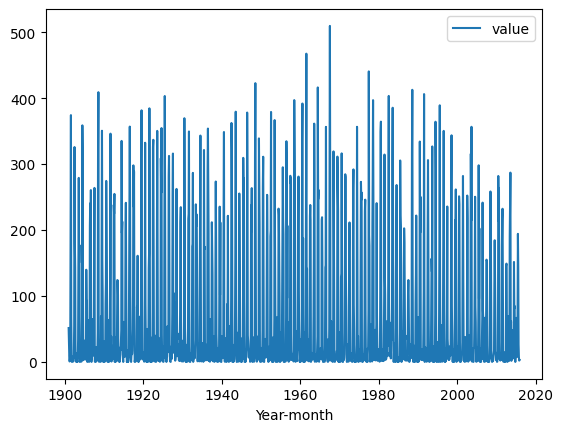

In [64]:
sns.lineplot(data)

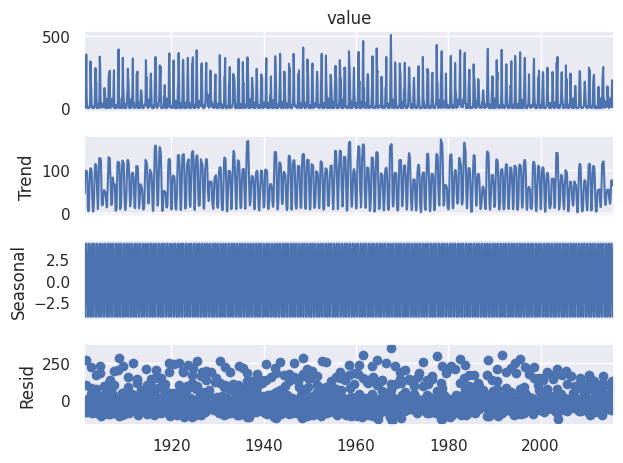

In [70]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(data['value'],model='additive', period=7)
decompose.plot()
plt.show()

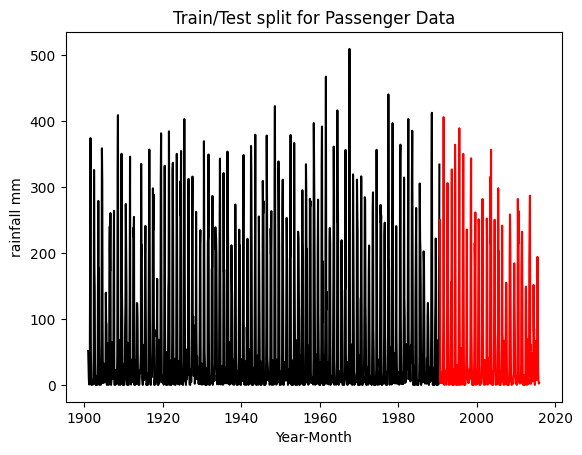

In [65]:
# split training and test
data['Date'] = data.index
train = data[data['Date'] < pd.to_datetime("1990-08", format='%Y-%m')]
del train['Date']
test = data[data['Date'] >= pd.to_datetime("1990-08", format='%Y-%m')]
del test['Date']

plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.title("Train/Test split for rainfall data")
plt.ylabel("rainfall mm")
plt.xlabel('Year-Month')
sns.set()
plt.show()

In [67]:
from pmdarima.arima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=12400.043, Time=1.72 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=13071.236, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=12674.272, Time=0.18 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=12672.194, Time=0.55 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=13474.180, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=12580.010, Time=1.44 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=12464.159, Time=1.06 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.91 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=12410.617, Time=1.67 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=12611.110, Time=0.30 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=12573.790, Time=1.04 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=12400.060, Time=0.93 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.55 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=12708.893, Time=0.21 sec

Best model:  ARIMA(2,0,2)(0,0,

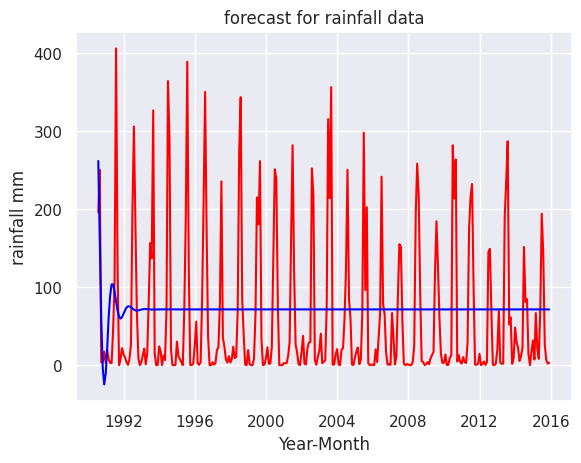

In [68]:
plt.clf()
plt.plot(test, color = "red")
plt.plot(forecast, color = "blue")
plt.title("forecast for rainfall data")
plt.ylabel("rainfall mm")
plt.xlabel('Year-Month')
sns.set()
plt.show()

In [69]:
forecast

,Prediction
Year-month,
1990-08-01,261.836260
1990-09-01,155.040906
1990-10-01,57.669126
1990-11-01,-4.657390
1990-12-01,-24.770364
...,...
2015-08-01,71.489543
2015-09-01,71.489543
2015-10-01,71.489543


Just work with West Uttar Pradesh data for POC
just googled top grains-producing regions idk

sources
kaggle dataset
https://www.kaggle.com/datasets/rajanand/rainfall-in-india/data?select=rainfall+in+india+1901-2015.csv
linear regression example
https://www.kaggle.com/code/ab22ecb0c36/rainfall-prediction-using-linear-regression
time series
https://builtin.com/data-science/time-series-python

https://stackoverflow.com/questions/63754844/converting-month-column-data-to-row
